In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import cv2
import os 


In [26]:
i1 = cv2.imread(r'D:\DataScienceAndAICourse\May-NLP\Deep-learning\10th-may\happyorsadpics\training\happy\WhatsApp Image 2025-05-12 at 6.24.18 PM.jpeg')

In [27]:
i1

array([[[115, 132, 165],
        [110, 127, 160],
        [108, 125, 158],
        ...,
        [ 96,  97, 101],
        [137, 140, 145],
        [163, 166, 171]],

       [[113, 128, 160],
        [108, 123, 155],
        [107, 122, 154],
        ...,
        [ 97,  98, 102],
        [138, 141, 146],
        [162, 165, 170]],

       [[112, 126, 155],
        [107, 121, 150],
        [105, 119, 148],
        ...,
        [ 98,  99, 103],
        [139, 142, 147],
        [161, 164, 169]],

       ...,

       [[  9,   6,  22],
        [  7,   7,  21],
        [  6,   5,  21],
        ...,
        [ 13,  10,  25],
        [ 21,  18,  33],
        [ 26,  23,  38]],

       [[  6,   1,  16],
        [  5,   3,  15],
        [  5,   2,  17],
        ...,
        [ 21,  18,  34],
        [ 29,  26,  42],
        [ 34,  31,  47]],

       [[  7,   3,  15],
        [  8,   4,  16],
        [  6,   4,  16],
        ...,
        [ 27,  24,  40],
        [ 35,  31,  50],
        [ 38,  34,  53]]

In [28]:
i1.shape

(1280, 960, 3)

In [29]:
train= ImageDataGenerator(rescale = 1/255)

In [30]:
validation = ImageDataGenerator(rescale= 1/255)

In [31]:
train_dataset = train.flow_from_directory(r'D:\DataScienceAndAICourse\May-NLP\Deep-learning\10th-may\happyorsadpics\training'
                                         ,target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')


Found 10 images belonging to 2 classes.


In [32]:
validation_dataset = validation.flow_from_directory(r'D:\DataScienceAndAICourse\May-NLP\Deep-learning\10th-may\happyorsadpics\validation'
                                                  ,target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 0 images belonging to 0 classes.


In [33]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [34]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [37]:
validation_dataset.classes

array([], dtype=int32)

In [38]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')])
                                   

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      17,334,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [40]:
model_fit=model.fit(train_dataset,
                   epochs=1) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.7629 - loss: 4.5700


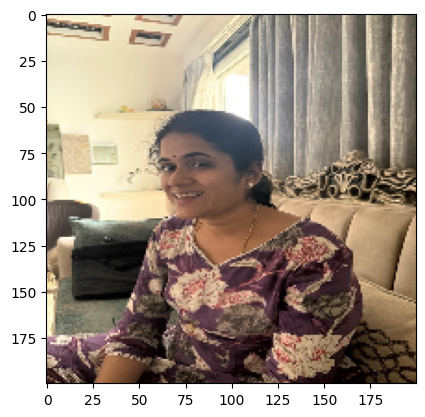

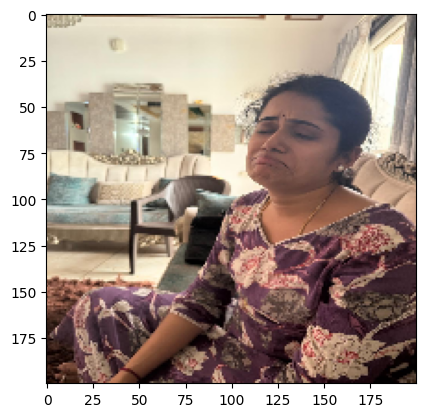

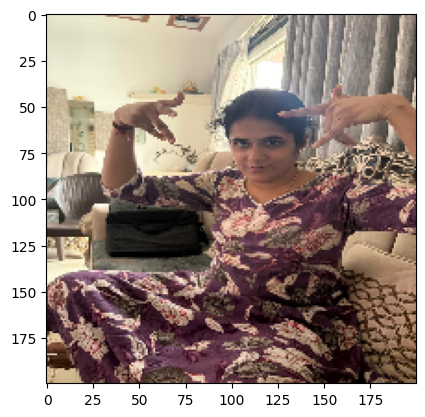

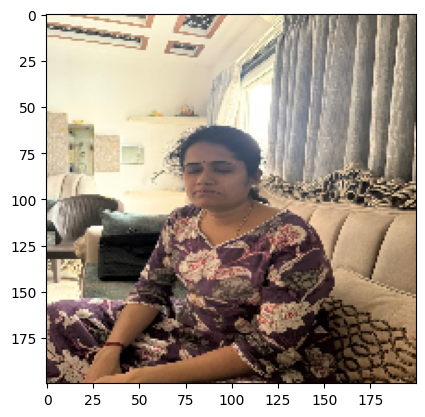

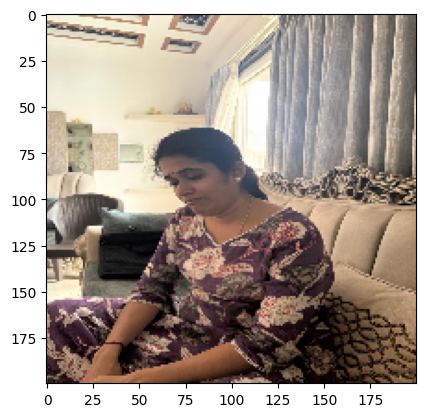

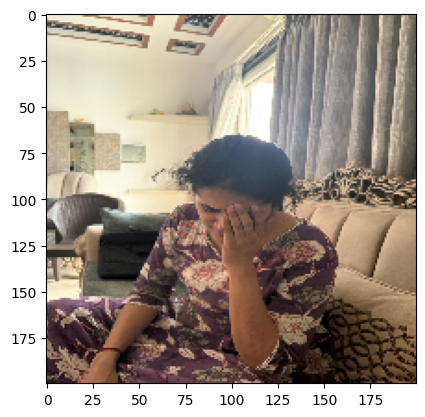

In [41]:
dir_path = r'D:\DataScienceAndAICourse\May-NLP\Deep-learning\10th-may\happyorsadpics\testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

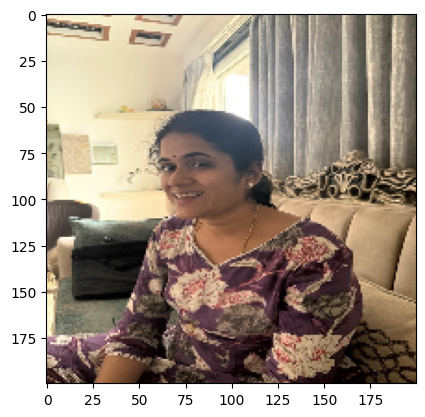

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
i am not happy


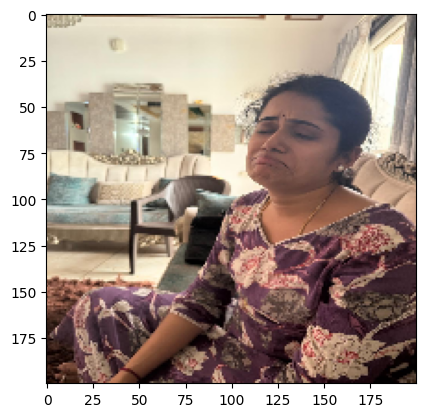

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
i am not happy


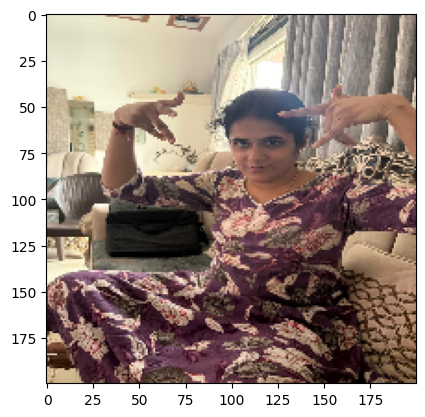

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
i am not happy


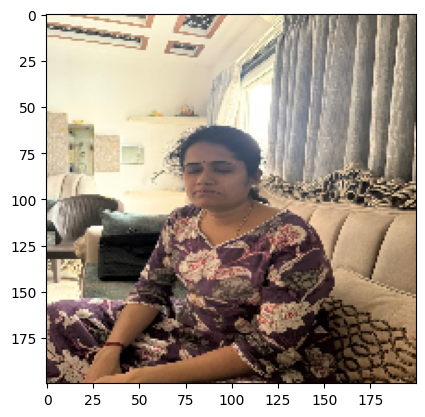

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
i am not happy


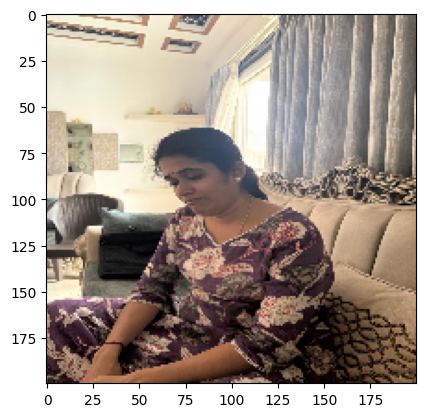

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
i am not happy


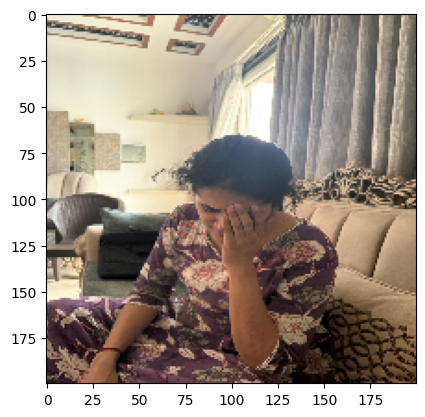

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
i am not happy


In [42]:
dir_path = r'D:\DataScienceAndAICourse\May-NLP\Deep-learning\10th-may\happyorsadpics\testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x= np.expand_dims(x,axis=0)
    images= np.vstack([x])

    val= model.predict(images)
    if val == 0:
        print('i am happy')
    else: 
        print('i am not happy')
    